In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import cv2
import math
import matplotlib.pyplot as plt

In [2]:
train_dir = "C:/Users/joshi/OneDrive/Desktop/FaceForensics++/ImagesFinal/train"
val_dir = "C:/Users/joshi/OneDrive/Desktop/FaceForensics++/ImagesFinal/val"
test_dir = "C:/Users/joshi/OneDrive/Desktop/FaceForensics++/ImagesFinal/test"

In [3]:
labels = ['Fake','Real']

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("C:/Users/joshi/OneDrive/Desktop/FaceForensics++/ImagesFinal/train",
                                                 target_size = (228, 228),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1594 images belonging to 2 classes.


In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('C:/Users/joshi/OneDrive/Desktop/FaceForensics++/ImagesFinal/test',
                                            target_size = (228, 228),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 201 images belonging to 2 classes.


In [6]:
val_datagen=ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory('C:/Users/joshi/OneDrive/Desktop/FaceForensics++/ImagesFinal/val',
                                            target_size = (228, 228),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 198 images belonging to 2 classes.


In [35]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [15]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model 
x = Input(shape = (228, 228, 3))
x1 = Conv2D(16, (3, 3), dilation_rate = 1, strides = 1, padding='same', activation = 'relu')(x)
x1 = Conv2D(4, (1, 1), padding='same', activation = 'relu')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(8, 8), padding='same')(x1)
y = Flatten()(x1)
y = Dropout(0.5)(y)
y = Dense(1, activation = 'sigmoid')(y)
cnn = Model(inputs = x, outputs = y)

In [16]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
cnn.fit(x=training_set,validation_data=test_set,epochs=25)

Epoch 1/25


50/50 [==============================] - 121s 2s/step - loss: 0.7228 - accuracy: 0.5163 - val_loss: 0.6905 - val_accuracy: 0.5423
Epoch 2/25
50/50 [==============================] - 28s 552ms/step - loss: 0.6953 - accuracy: 0.5678 - val_loss: 0.6926 - val_accuracy: 0.5025
Epoch 3/25
50/50 [==============================] - 32s 633ms/step - loss: 0.6758 - accuracy: 0.5709 - val_loss: 0.6902 - val_accuracy: 0.5274
Epoch 4/25
50/50 [==============================] - 26s 522ms/step - loss: 0.6629 - accuracy: 0.5979 - val_loss: 0.6861 - val_accuracy: 0.6070
Epoch 5/25
50/50 [==============================] - 25s 506ms/step - loss: 0.6486 - accuracy: 0.6092 - val_loss: 0.6817 - val_accuracy: 0.6119
Epoch 6/25
50/50 [==============================] - 24s 489ms/step - loss: 0.6388 - accuracy: 0.6274 - val_loss: 0.6755 - val_accuracy: 0.6318
Epoch 7/25
50/50 [==============================] - 24s 487ms/step - loss: 0.6329 - accuracy: 0.6418 - val_loss: 0.6647 - val_accuracy: 0.6517

In [ ]:
model.save("NASNet1.h5")

In [19]:
val_set.class_indices

{'Fake': 0, 'Real': 1}

7/7 [==============================] - 1s 100ms/step


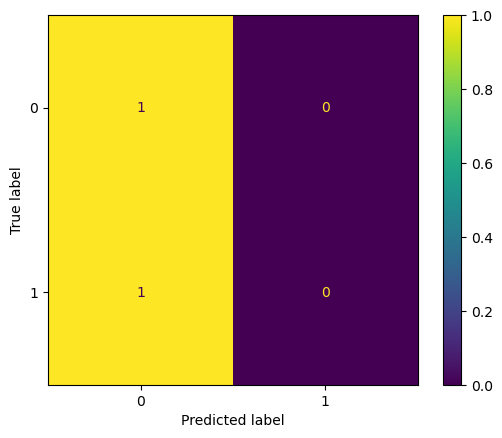

In [18]:
test_labels = val_set.classes
predictions = cnn.predict(x=val_set, verbose=1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_true=test_labels
y_pred=predictions.argmax(axis=1)
disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true')
#plt.savefig("EffNet123")

In [8]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model 
x = Input(shape = (228, 228, 3))
x1 = Conv2D(8, (3, 3), padding='same', activation = 'silu')(x)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

x2 = Conv2D(8, (5, 5), padding='same', activation = 'silu')(x1)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

x3 = Conv2D(16, (5, 5), padding='same', activation = 'silu')(x2)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

x4 = Conv2D(16, (5, 5), padding='same', activation = 'silu')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

y = Flatten()(x4)
y = Dropout(0.5)(y)
y = Dense(16)(y)
y = LeakyReLU(alpha=0.1)(y)
y = Dropout(0.5)(y)
y = Dense(1, activation = 'sigmoid')(y)
cnn = Model(inputs = x, outputs = y)

In [9]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
cnn.fit(x=training_set,validation_data=test_set,epochs=100)

Epoch 1/100
50/50 [==============================] - 32s 639ms/step - loss: 0.8074 - accuracy: 0.5263 - val_loss: 0.7103 - val_accuracy: 0.4975
Epoch 2/100
50/50 [==============================] - 33s 671ms/step - loss: 0.7566 - accuracy: 0.5483 - val_loss: 0.8451 - val_accuracy: 0.4975
Epoch 3/100
50/50 [==============================] - 32s 633ms/step - loss: 0.7593 - accuracy: 0.5402 - val_loss: 0.7157 - val_accuracy: 0.5025
Epoch 4/100
50/50 [==============================] - 32s 632ms/step - loss: 0.7137 - accuracy: 0.5759 - val_loss: 0.6830 - val_accuracy: 0.5821
Epoch 5/100
50/50 [==============================] - 31s 627ms/step - loss: 0.6915 - accuracy: 0.5859 - val_loss: 0.6846 - val_accuracy: 0.5473
Epoch 6/100
50/50 [==============================] - 31s 625ms/step - loss: 0.6812 - accuracy: 0.6016 - val_loss: 0.7183 - val_accuracy: 0.5274
Epoch 7/100
50/50 [==============================] - 31s 628ms/step - loss: 0.6732 - accuracy: 0.6136 - val_loss: 0.7602 - val_accuracy:

Epoch 58/100
50/50 [==============================] - 52s 1s/step - loss: 0.1722 - accuracy: 0.9322 - val_loss: 0.1173 - val_accuracy: 0.9453
Epoch 59/100
50/50 [==============================] - 51s 1s/step - loss: 0.1298 - accuracy: 0.9454 - val_loss: 0.3818 - val_accuracy: 0.8259
Epoch 60/100
50/50 [==============================] - 53s 1s/step - loss: 0.1629 - accuracy: 0.9316 - val_loss: 0.3983 - val_accuracy: 0.8159
Epoch 61/100
50/50 [==============================] - 52s 1s/step - loss: 0.1920 - accuracy: 0.9348 - val_loss: 0.3629 - val_accuracy: 0.7861
Epoch 62/100
50/50 [==============================] - 52s 1s/step - loss: 0.1239 - accuracy: 0.9536 - val_loss: 0.3255 - val_accuracy: 0.8358
Epoch 63/100
50/50 [==============================] - 52s 1s/step - loss: 0.1468 - accuracy: 0.9429 - val_loss: 0.3067 - val_accuracy: 0.8408
Epoch 64/100
50/50 [==============================] - 54s 1s/step - loss: 0.1339 - accuracy: 0.9479 - val_loss: 0.6815 - val_accuracy: 0.7910
Epoch 

7/7 [==============================] - 2s 154ms/step


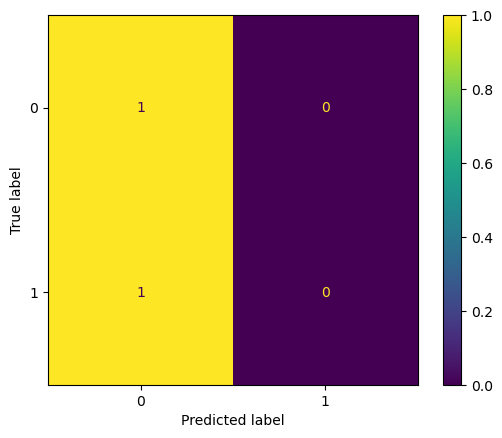

In [12]:
test_labels = val_set.classes
predictions = cnn.predict(x=val_set, verbose=1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_true=test_labels
y_pred=predictions.argmax(axis=1)
disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true')
#plt.savefig("EffNet123")